# CIFAR-10 Multiple Classes



-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
x_train.shape    

(50000, 32, 32, 3)

In [5]:
x_train[1].shape

(32, 32, 3)

In [6]:
import matplotlib.pyplot as plt

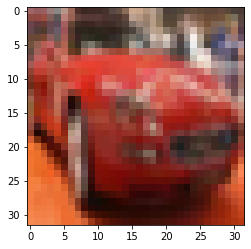

In [11]:
# FROG
plt.imshow(x_train[5])

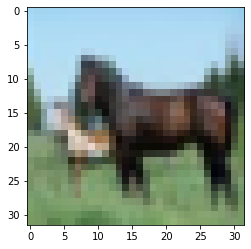

In [12]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [13]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
x_train[0].shape

(32, 32, 3)

In [15]:
x_train.max()

255

In [16]:
x_train = x_train/225

In [17]:
x_test = x_test/255

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [24]:
from keras.utils import to_categorical

In [25]:
y_train.shape

(50000, 1)

In [31]:
y_train[0]

array([6], dtype=uint8)

In [27]:
y_cat_train = to_categorical(y_train,10)   #one hot encoding   #scikit integer encoding 

#label encoder is integer encoding 

In [28]:
y_cat_train.shape

(50000, 10)

In [33]:
y_cat_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [38]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 3ms/step - loss: 1.7297 - accuracy: 0.3660
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1966 - accuracy: 0.5757
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0075 - accuracy: 0.6468
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9013 - accuracy: 0.6861
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8014 - accuracy: 0.7186
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7141 - accuracy: 0.7498
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6430 - accuracy: 0.7742
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5741 - accuracy: 0.8022
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5151 - accuracy: 0.8234
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.45

In [40]:
model.save('cifar_10epochs.h5') #pickle in python



#loading the saved model and later using it for classfication    

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

## Optional: Large Model

In [ ]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
model.save('larger_CIFAR10_model.h5')

___